# Load and read the data

In [ ]:
# Import the pandas for reading the data
import pandas as pd

In [ ]:
# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/UCI%20Heart%20Disease.csv')

In [ ]:
# Visualize the top 5 rows
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Checking the size
data.shape

(303, 14)

In [ ]:
# Check the target variable
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
# Percentage distribution of class
data.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

# Preprocessing and defining input output features

In [ ]:
# Defining input and output features
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [ ]:
# preparing training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# check the shapes
print('Number of rows and columns of x_train resp {}'.format(X_train.shape))
print('Number of rows and columns of x_test  resp {}'.format(X_test.shape))

Number of rows and columns of x_train resp (242, 13)
Number of rows and columns of x_test  resp (61, 13)


In [ ]:
# input patterns
X_train

array([[43.,  0.,  2., ...,  1.,  0.,  2.],
       [66.,  0.,  2., ...,  1.,  1.,  2.],
       [58.,  1.,  2., ...,  2.,  0.,  2.],
       ...,
       [56.,  1.,  3., ...,  1.,  0.,  3.],
       [47.,  1.,  2., ...,  2.,  0.,  2.],
       [58.,  1.,  1., ...,  1.,  0.,  2.]])

In [ ]:
# scaling the train and test set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initializing and training K-NN Classifier

In [ ]:
# Initializing the K-NN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [ ]:
# get the optimal value of K uisng GridSearch
from sklearn.model_selection import GridSearchCV
# set the range of k
k = list(range(1,41))
param_grid  = {'n_neighbors':k,'metric':['euclidean','minkowski']}
grid = GridSearchCV(model, param_grid,scoring='accuracy', return_train_score=False)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'metric': 'euclidean', 'n_neighbors': 16}


In [ ]:
# finalizing the model with k=16
KNN_classifier = KNeighborsClassifier(n_neighbors=16, metric='euclidean')
# training the classifier
KNN_classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=16)

# Evaluating the classifier

In [ ]:
# train score
KNN_classifier.score(X_train, y_train)

0.8512396694214877

In [ ]:
# test score
KNN_classifier.score(X_test,y_test)

0.8360655737704918

In [ ]:
# get the predicitons
y_pred = KNN_classifier.predict(X_test)

In [ ]:
# compare the actual and predicted values
pd.DataFrame(data={'Actual':y_test,'Predicted':y_pred}).head()

,Actual,Predicted
0,0,0
1,1,1
2,0,1
3,0,0
4,1,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


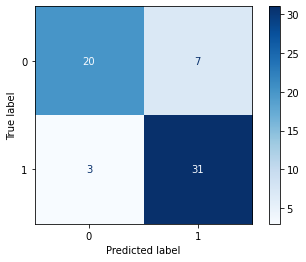

In [ ]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(KNN_classifier,X_test,y_test, cmap='Blues')

In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80        27
           1       0.82      0.91      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61

